In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [293]:
df = pd.read_csv('msis_class_activity_spring2022.csv')

In [294]:
df.head()

,order_id,customer_id,product_id,category,is_alexa_ordered,order_time_stamp,order_date,order_hour_of_day,cancel_hour_of_day,return_date,cancel_time_stamp
0,0,10000664,vnBDut2u7xbOLzKC,Grocery and Gourmet Food,0.0,2016-01-13 09:47:50,2016-01-13,9,NaN,NaN,NaN
1,1,10000664,8xDS8EwImpxBYDmi,Home and Kitchen,0.0,2016-01-02 19:36:43,2016-01-02,19,NaN,NaN,NaN
2,2,10000664,fCNWLZ16EKCyUiIM,Grocery and Gourmet Food,0.0,2016-01-12 06:32:09,2016-01-12,6,NaN,NaN,NaN
3,3,10000664,BYj6nW4IJdGaETlh,Grocery and Gourmet Food,0.0,2016-01-09 06:56:03,2016-01-09,6,NaN,NaN,NaN
4,4,10000664,oqZFwnfcLSsLUsx4,"Clothing, Shoes and Jewelry",0.0,2016-01-11 21:06:02,2016-01-11,21,NaN,NaN,NaN


In [333]:
data = df.copy()

## 1. Data exploration 

Find all the categories that were purchased 

In [295]:
df['category'].unique()

array(['Grocery and Gourmet Food', 'Home and Kitchen',
       'Clothing, Shoes and Jewelry', 'Electronics',
       'Sports and Outdoors', 'Books', 'Patio, Lawn and Garden',
       'Toys and Games', 'Baby', 'Tools and Home Improvement'],
      dtype=object)

Calculate how many products were sold in each category

In [296]:
df.groupby('category')['order_id'].count().sort_values()

category
Patio, Lawn and Garden           411
Tools and Home Improvement       426
Baby                            1329
Sports and Outdoors             1602
Books                           2001
Toys and Games                  2549
Electronics                     3188
Clothing, Shoes and Jewelry     4956
Grocery and Gourmet Food        9827
Home and Kitchen               10680
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Units sold each category')

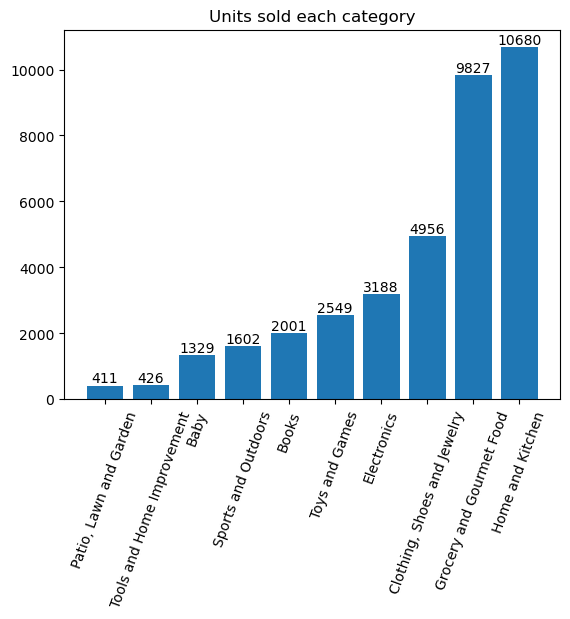

In [297]:
ax = plt.bar(df.groupby('category')['order_id'].count().sort_values().keys(),np.array(df.groupby('category')['order_id'].count().sort_values()))
plt.xticks(rotation=70)
plt.bar_label(ax)
plt.title('Units sold each category')

In [298]:
df.groupby('category')['order_id'].count()/df['order_id'].count()

category
Baby                           0.035949
Books                          0.054126
Clothing, Shoes and Jewelry    0.134058
Electronics                    0.086234
Grocery and Gourmet Food       0.265817
Home and Kitchen               0.288891
Patio, Lawn and Garden         0.011117
Sports and Outdoors            0.043334
Tools and Home Improvement     0.011523
Toys and Games                 0.068950
Name: order_id, dtype: float64

In [299]:
df.groupby('category')['order_id'].count().keys()

Index(['Baby', 'Books', 'Clothing, Shoes and Jewelry', 'Electronics',
       'Grocery and Gourmet Food', 'Home and Kitchen',
       'Patio, Lawn and Garden', 'Sports and Outdoors',
       'Tools and Home Improvement', 'Toys and Games'],
      dtype='object', name='category')

Text(0.5, 1.0, '% each category')

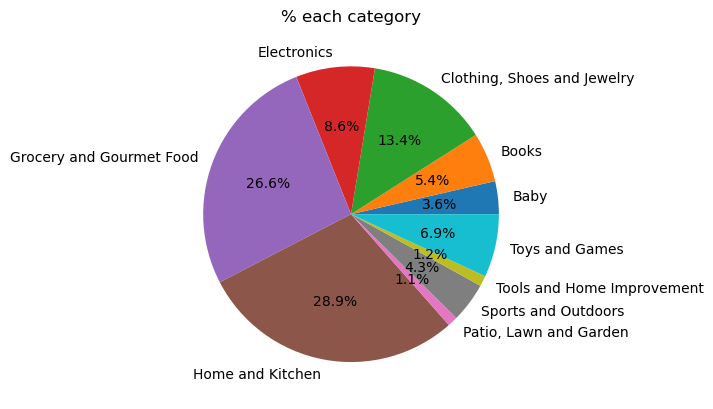

In [300]:
plt.pie(df.groupby('category')['order_id'].count()/df['order_id'].count(), 
        labels = df.groupby('category')['order_id'].count().keys(), autopct='%1.1f%%')

plt.title('% each category')

Find the orders that were canceled or returned or canceled/or returned (Create binary variables to indicate each state) 

In [301]:
df['is_cancelled'] = df['cancel_hour_of_day'] >=0

In [302]:
df['is_returned'] = df['return_date'].notnull()

In [303]:
can = df[df['is_cancelled'] == True].groupby('category')['order_id'].count()/df.groupby('category')['order_id'].count()

In [304]:
can

category
Baby                           0.029345
Books                          0.040980
Clothing, Shoes and Jewelry    0.042373
Electronics                    0.037641
Grocery and Gourmet Food       0.029816
Home and Kitchen               0.042322
Patio, Lawn and Garden         0.026764
Sports and Outdoors            0.041199
Tools and Home Improvement     0.053991
Toys and Games                 0.297764
Name: order_id, dtype: float64

Text(0.5, 1.0, 'Cancellation rate each category')

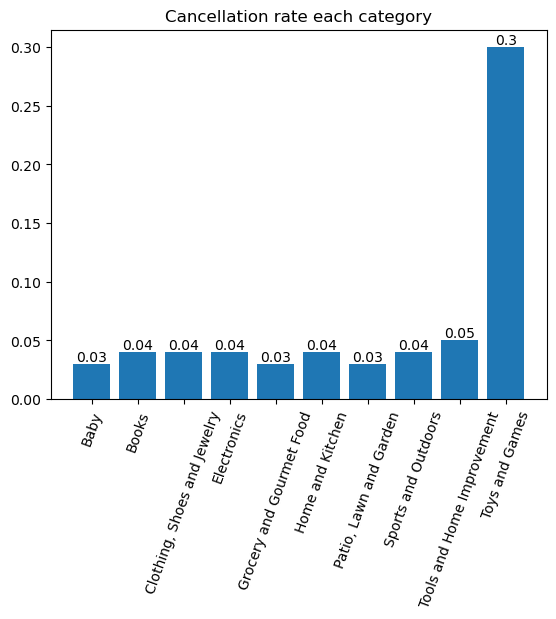

In [305]:
ax = plt.bar(can.keys(),np.round(np.array(can),2))
plt.xticks(rotation=70)
plt.bar_label(ax)
plt.title('Cancellation rate each category')

In [306]:
ret = df[df['is_returned'] == True].groupby('category')['order_id'].count()/df.groupby('category')['order_id'].count()
ret

category
Baby                           0.043642
Books                          0.070965
Clothing, Shoes and Jewelry    0.058111
Electronics                    0.061481
Grocery and Gourmet Food       0.041518
Home and Kitchen               0.054120
Patio, Lawn and Garden         0.055961
Sports and Outdoors            0.062422
Tools and Home Improvement     0.063380
Toys and Games                 0.032954
Name: order_id, dtype: float64

Text(0.5, 1.0, 'Return rate each category')

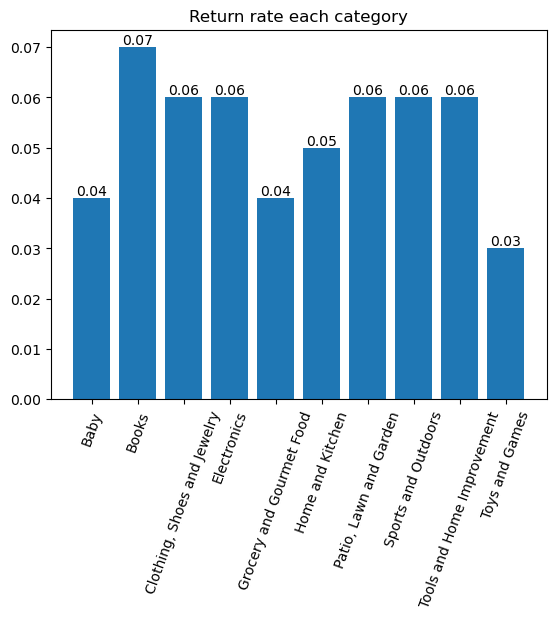

In [307]:
ax = plt.bar(ret.keys(),np.round(np.array(ret),2))
plt.xticks(rotation=70)
plt.bar_label(ax)
plt.title('Return rate each category')

Text(0.5, 1.0, 'Cancel or Return rate each category')

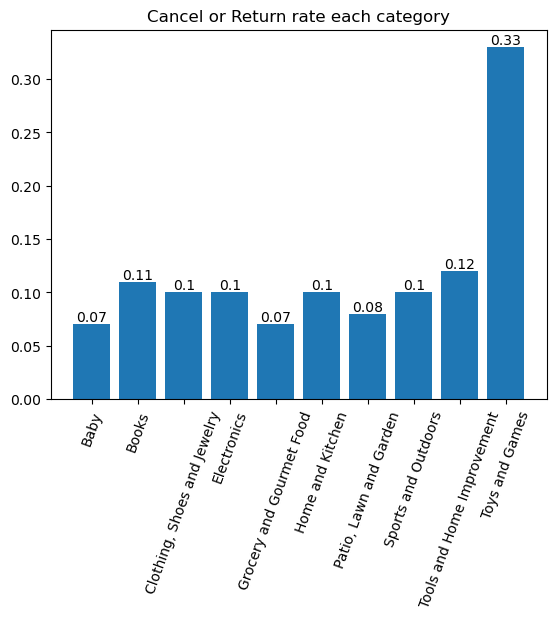

In [308]:
ax = plt.bar(ret.keys(),np.round(np.array(can+ret),2))
plt.xticks(rotation=70)
plt.bar_label(ax)
plt.title('Cancel or Return rate each category')

## 2. Assume and Define 
See if you can find a way to categorize households based on what they buy.
Hint 1: Some examples are "Busy young people buy more than 3 grocery + home and kitchen" "Sporty households buy more than 3 sport items" "Techy households buy more than 3 electronic items". Fix the number as 3 and see how many households fall in this category

In [309]:
# Household with kids: households who boughrt > 3 orders of baby or toys and games

In [310]:
par = df[(df.category =='Baby')|(df.category =='Toys and Games')].groupby('customer_id')['order_id'].count() > 3

In [311]:
parents = df[df.customer_id.isin(par.keys())]

## 3. Alexa Orders
a. Find what products get purchased over Alexa

b. Do you notice anything weird? What is expected and what is not expected?

In [312]:
df[df['is_alexa_ordered']==1]['order_id'].count()

5956

In [313]:
# 16% of orders are alexa-made
df[df['is_alexa_ordered']==1]['order_id'].count()/ df['order_id'].count()

0.16110795531391164

### Among all categories of Alexa orders, % of 'Toys and games'(15.2%) is unreasonably high in comparison to its % in non-alexa orders(5.3%). 

In [314]:
df[df['is_alexa_ordered']==1].groupby('category')['order_id'].count()

category
Baby                         330
Grocery and Gourmet Food    2250
Home and Kitchen            2470
Toys and Games               906
Name: order_id, dtype: int64

Text(0.5, 1.0, '% each category of Alexa orders')

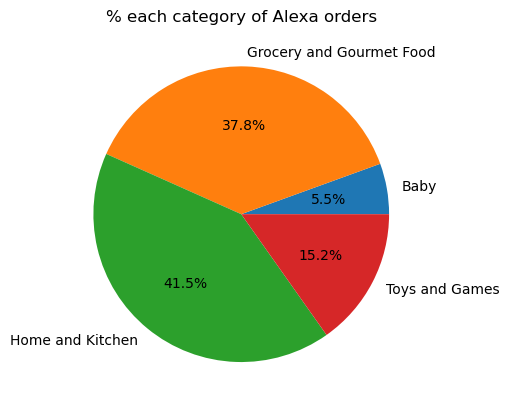

In [315]:
plt.pie(df[df['is_alexa_ordered']==1].groupby('category')['order_id'].count(), 
        labels = df[df['is_alexa_ordered']==1].groupby('category')['order_id'].count().keys(), autopct='%1.1f%%')
plt.title('% each category of Alexa orders')

Text(0.5, 1.0, '% each category of Non-Alexa orders')

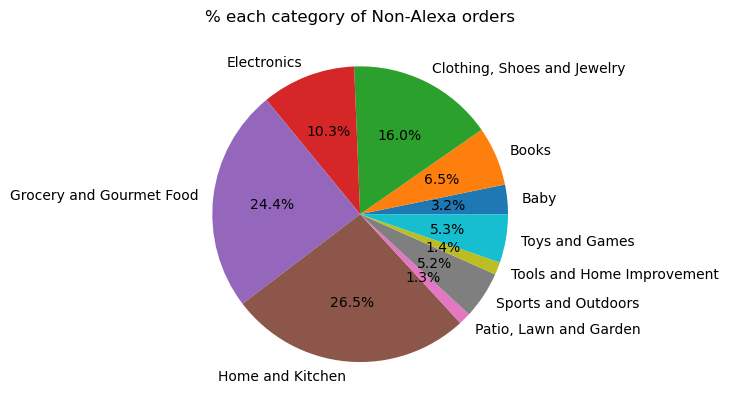

In [316]:
plt.pie(df[df['is_alexa_ordered']==0].groupby('category')['order_id'].count(), 
        labels = df[df['is_alexa_ordered']==0].groupby('category')['order_id'].count().keys(), autopct='%1.1f%%')
plt.title('% each category of Non-Alexa orders')

### 84% of Toys and Games alexa orders were cancelled. While none of Toys and Games non-alexa orders were canceled.

In [317]:
df[df['is_cancelled']].groupby(['is_alexa_ordered', 'category'])['order_id'].count()*1/df.groupby(['is_alexa_ordered', 'category'])['order_id'].count()*1

is_alexa_ordered  category                   
0.0               Baby                           0.039039
                  Books                          0.040980
                  Clothing, Shoes and Jewelry    0.042373
                  Electronics                    0.037641
                  Grocery and Gourmet Food       0.038670
                  Home and Kitchen               0.043362
                  Patio, Lawn and Garden         0.026764
                  Sports and Outdoors            0.041199
                  Tools and Home Improvement     0.053991
                  Toys and Games                      NaN
1.0               Baby                                NaN
                  Grocery and Gourmet Food            NaN
                  Home and Kitchen               0.038866
                  Toys and Games                 0.837748
Name: order_id, dtype: float64

In [318]:
df[df['is_returned']].groupby(['is_alexa_ordered', 'category'])['order_id'].count()*1/df.groupby(['is_alexa_ordered', 'category'])['order_id'].count()*1

is_alexa_ordered  category                   
0.0               Baby                           0.058058
                  Books                          0.070965
                  Clothing, Shoes and Jewelry    0.058111
                  Electronics                    0.061481
                  Grocery and Gourmet Food       0.053847
                  Home and Kitchen               0.067966
                  Patio, Lawn and Garden         0.055961
                  Sports and Outdoors            0.062422
                  Tools and Home Improvement     0.063380
                  Toys and Games                      NaN
1.0               Baby                                NaN
                  Grocery and Gourmet Food            NaN
                  Home and Kitchen               0.008097
                  Toys and Games                 0.092715
Name: order_id, dtype: float64

###  All alexa toy and game orders are made by household with kids

In [319]:
alexa_toy_order = df[(df['category'] == 'Toys and Games')&(df['is_alexa_ordered']==1)]['customer_id'].unique()

In [320]:
parent_id = parents['customer_id'].unique()

In [321]:
# find out the alexa_toy_order customer who is not a parent, and the result is none
np.setdiff1d(alexa_toy_order, parent_id)

array([], dtype=int64)

## Dig into alexa toy and game orders

In [322]:
alexa_toy_order = df[(df['category'] == 'Toys and Games')&(df['is_alexa_ordered']==1)]

In [323]:
alexa_toy_order.describe()

,order_id,customer_id,is_alexa_ordered,order_hour_of_day,cancel_hour_of_day
count,906.000000,9.060000e+02,906.0,906.000000,759.000000
mean,25387.762693,5.452346e+07,1.0,17.952539,17.159420
std,13644.974865,2.552821e+07,0.0,2.871263,7.198258
min,54.000000,1.020814e+07,1.0,0.000000,0.000000
25%,13601.250000,3.196000e+07,1.0,17.000000,18.000000
50%,26960.500000,5.472902e+07,1.0,19.000000,20.000000
75%,40077.750000,7.538480e+07,1.0,19.000000,21.000000
max,40304.000000,9.997603e+07,1.0,23.000000,23.000000


###  Orders are made mostly from 16:00 - 20:00. And cancelled from 19:00 - 22:00.

In [324]:
o = alexa_toy_order.groupby('order_hour_of_day')['order_id'].count()

Text(0.5, 1.0, 'Alexa toy and game orders made by hour of the day')

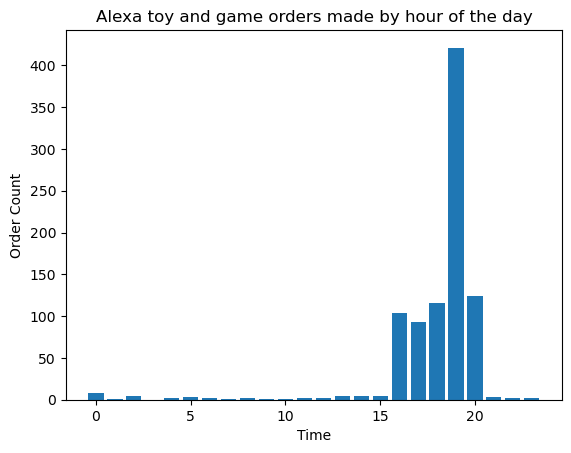

In [325]:
plt.bar(o.keys(), np.array(o))
plt.xlabel('Time')
plt.ylabel('Order Count')
plt.title('Alexa toy and game orders made by hour of the day')

In [326]:
c = alexa_toy_order.groupby('cancel_hour_of_day')['order_id'].count()

Text(0.5, 1.0, 'Alexa - Toy and Game cancel time')

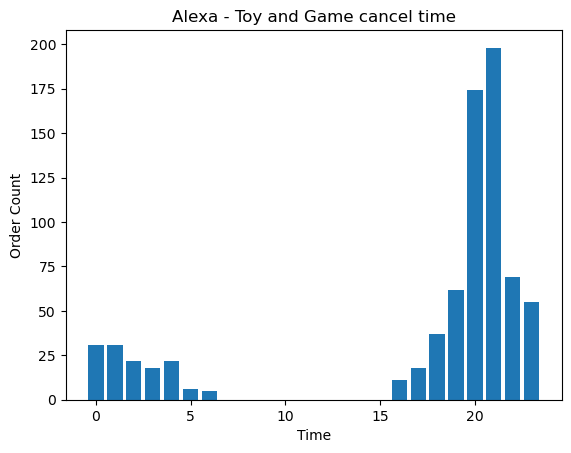

In [341]:
plt.bar(c.keys(), np.array(c))
plt.xlabel('Time')
plt.ylabel('Order Count')
plt.title('Alexa - Toy and Game cancel time')

In [328]:
import datetime as dt
alexa_toy_order['order_weekday'] = pd.to_datetime(alexa_toy_order['order_time_stamp']).dt.weekday

/var/folders/x7/dln2v9vs69gdf84nt96l91b40000gn/T/ipykernel_34587/3262076888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alexa_toy_order['order_weekday'] = pd.to_datetime(alexa_toy_order['order_time_stamp']).dt.weekday


In [329]:
# Most orders are made on Wednesday
alexa_toy_order.groupby('order_weekday')['order_id'].count()

order_weekday
0     94
1     88
2    386
3     93
4     74
5     79
6     92
Name: order_id, dtype: int64

In [330]:
alexa_toy_order['cancel_weekday'] = pd.to_datetime(alexa_toy_order['cancel_time_stamp']).dt.weekday

/var/folders/x7/dln2v9vs69gdf84nt96l91b40000gn/T/ipykernel_34587/1921581389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alexa_toy_order['cancel_weekday'] = pd.to_datetime(alexa_toy_order['cancel_time_stamp']).dt.weekday


In [331]:
# Cancel day are evenly distributed
alexa_toy_order.groupby('cancel_weekday')['order_id'].count()

cancel_weekday
0.0    116
1.0     82
2.0     99
3.0    120
4.0    108
5.0    100
6.0    134
Name: order_id, dtype: int64

In [335]:
import seaborn as sns

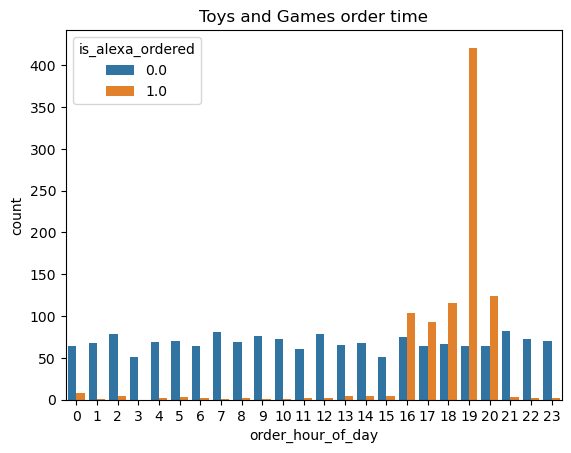

In [340]:
data1 = data[data.category== "Toys and Games"]
sns.countplot(x ='order_hour_of_day',hue = 'is_alexa_ordered',data =data1).set(title='Toys and Games order time')

plt.show()